# Setup

In [1]:
from imports import *
from utils import *
from agents import UrnAgent, QLearningAgent, TDLearningAgent
from environment import NetMultiAgentEnv, TempNetMultiAgentEnv
from simulation_function import simulation_function, temp_simulation_function

# Urn Agent

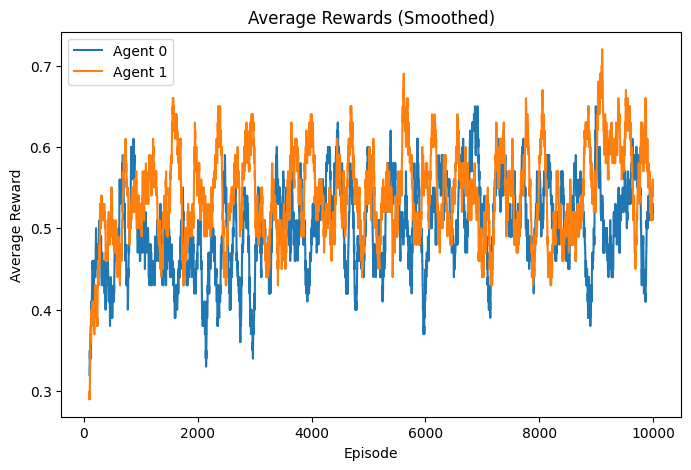

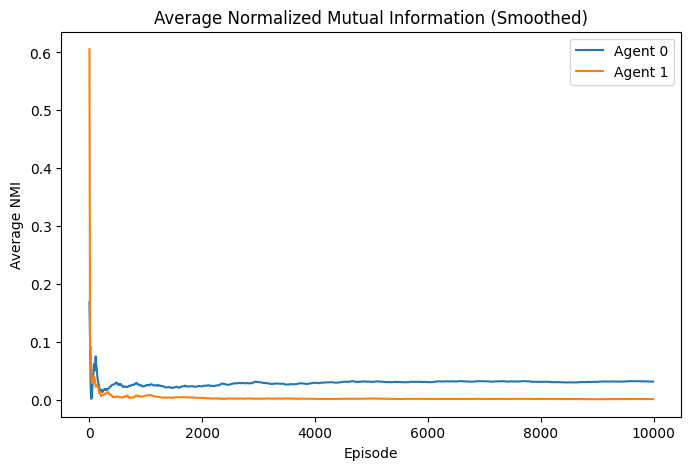

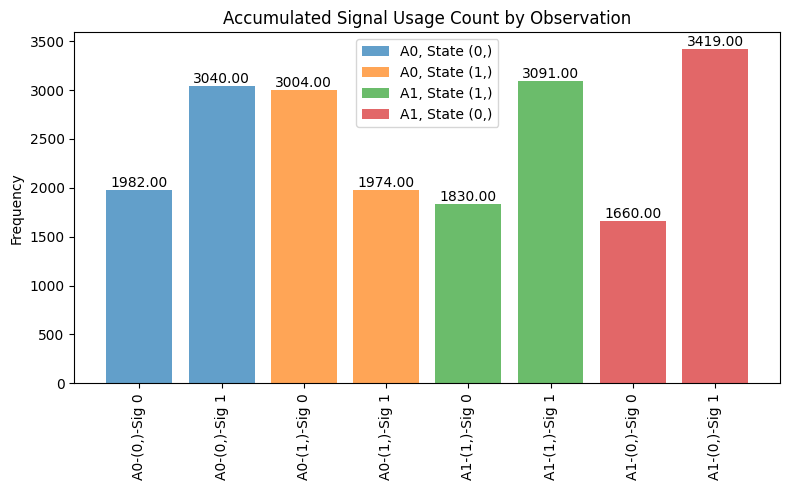

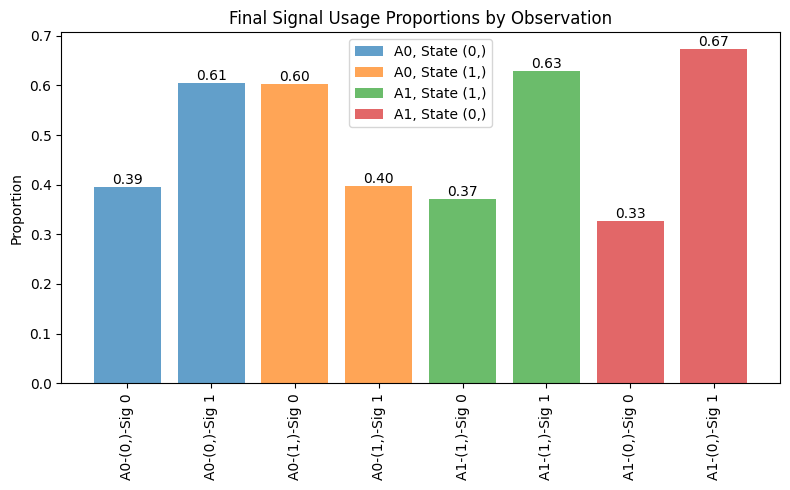

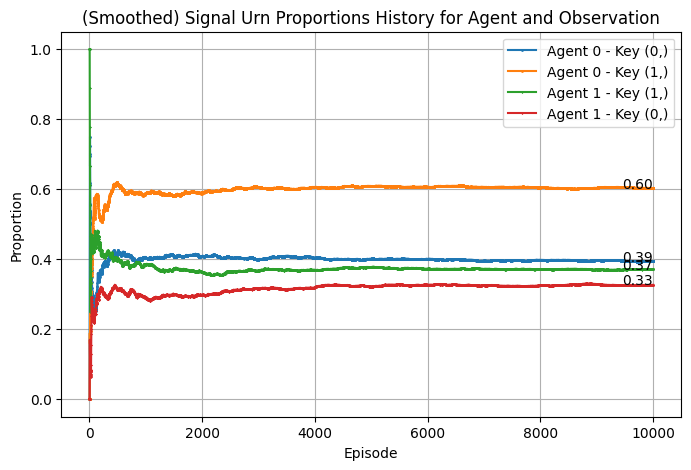

In [2]:
n_agents = 2
n_features = 2
agents_observed_variables = {0:[0],1:[1]}

G = nx.DiGraph()
G.add_nodes_from([0,1])  # Adds multiple nodes at once
G.add_edges_from([(0, 1), (1, 0)])  # Adds multiple edges

n_signaling_actions = 2
n_final_actions = 4

# n_agents = 2
# n_features = 3
# agents_observed_variables = {0:[0,1],1:[1,2]}
# n_signaling_actions = 4
# n_final_actions = 8

randomcannonical_game = {}
for i in range(n_agents):
  randomcannonical_game[i] = create_random_canonical_game(n_features,n_final_actions,n=1,m=0)

with_signals, full_information = True, False

env = NetMultiAgentEnv(n_agents=n_agents, n_features=n_features,
                  n_signaling_actions=n_signaling_actions,
                  n_final_actions=n_final_actions,
                  full_information = full_information,
                  game_dicts=randomcannonical_game,
                  observed_variables = agents_observed_variables,
                  agent_type=UrnAgent,
                  initialize = False,
                  graph=G)

signal_usage, rewards_history, signal_information_history, nature_history, histories = simulation_function(n_agents=n_agents,
                      n_features=n_features, n_signaling_actions=n_signaling_actions, n_final_actions=n_final_actions,
                      n_episodes=10000, with_signals = with_signals, plot=True,env=env, verbose=False)

# QLearning Agent

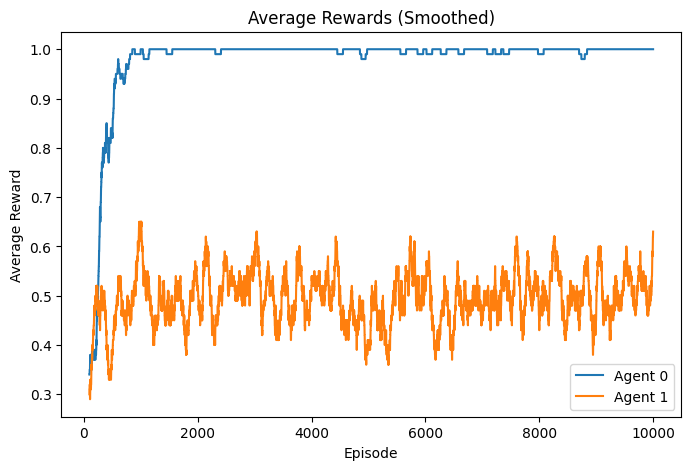

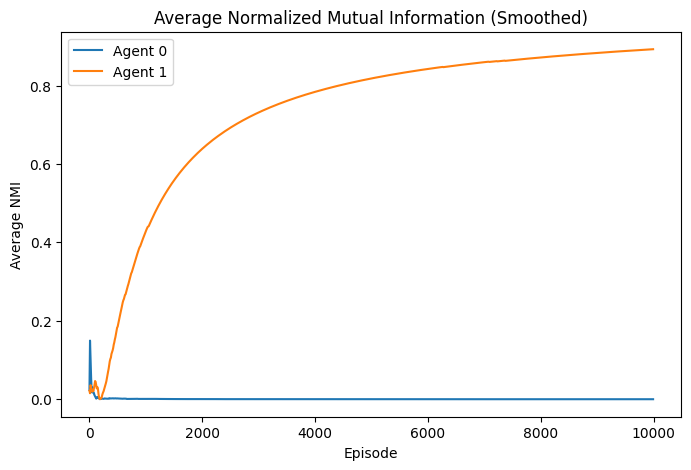

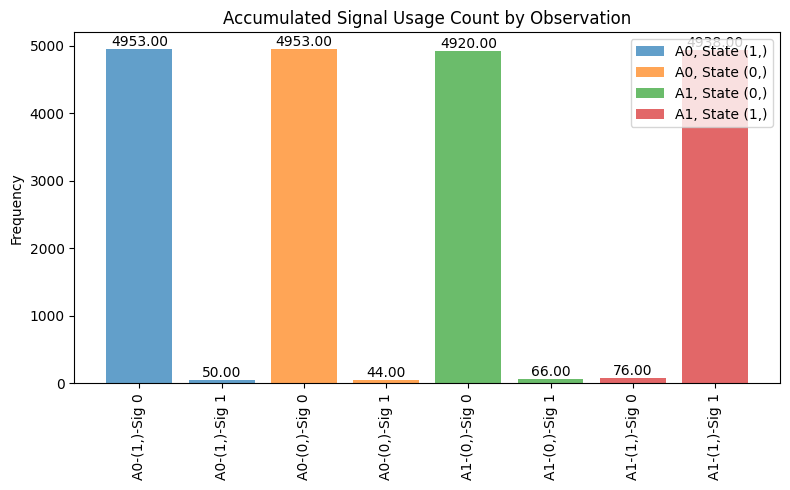

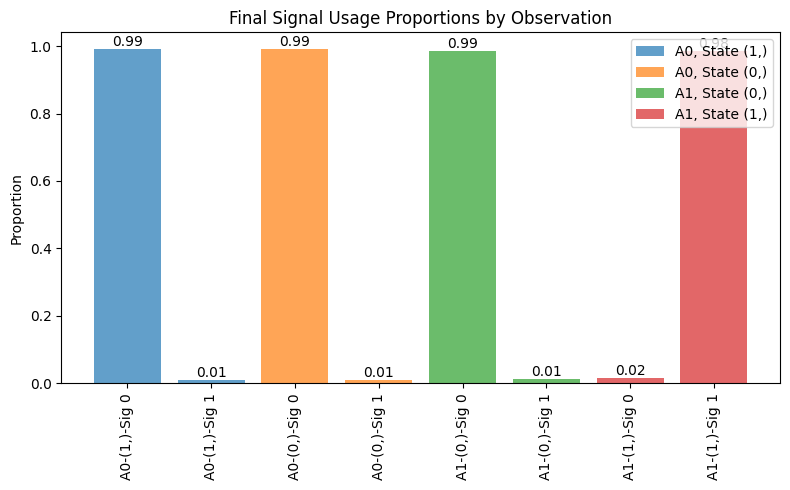

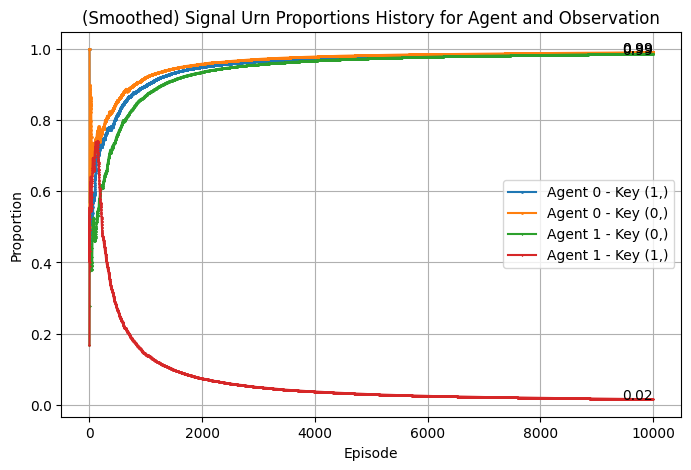

In [3]:
n_agents = 2
n_features = 2
agents_observed_variables = {0:[0],1:[1]}

G = nx.DiGraph()
G.add_nodes_from([0,1])  # Adds multiple nodes at once
G.add_edges_from([(0, 1), (1, 0)])  # Adds multiple edges

n_signaling_actions = 2
n_final_actions = 4

# n_agents = 2
# n_features = 3
# agents_observed_variables = {0:[0,1],1:[1,2]}
# n_signaling_actions = 4
# n_final_actions = 8

randomcannonical_game = {}
for i in range(n_agents):
  randomcannonical_game[i] = create_random_canonical_game(n_features,n_final_actions,n=1,m=0)

with_signals, full_information = True, False

env = NetMultiAgentEnv(n_agents=n_agents, n_features=n_features,
                  n_signaling_actions=n_signaling_actions,
                  n_final_actions=n_final_actions,
                  full_information = full_information,
                  game_dicts=randomcannonical_game,
                  observed_variables = agents_observed_variables,
                  agent_type=QLearningAgent,
                  initialize = False,
                  graph=G)

signal_usage, rewards_history, signal_information_history, nature_history, histories = simulation_function(n_agents=n_agents,
                      n_features=n_features, n_signaling_actions=n_signaling_actions, n_final_actions=n_final_actions,
                      n_episodes=10000, with_signals = with_signals,plot=True,env=env, verbose=False)

# Temporal Example

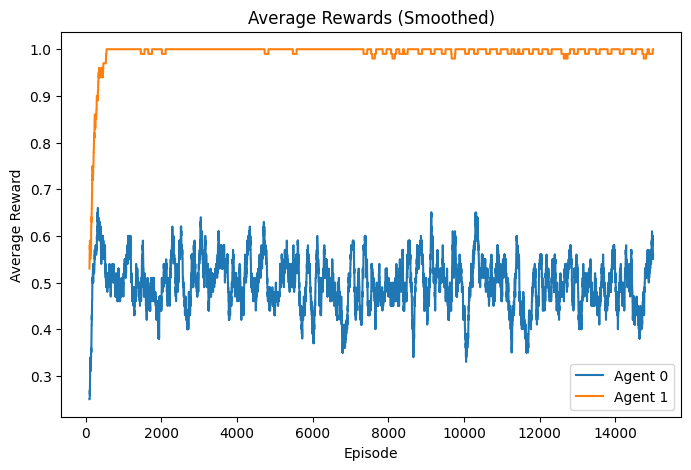

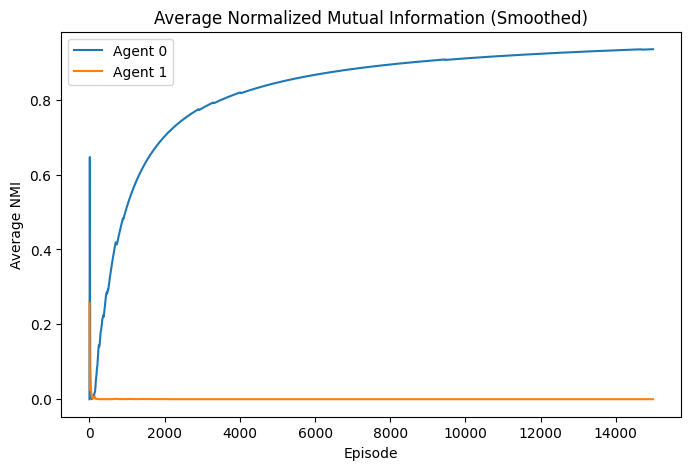

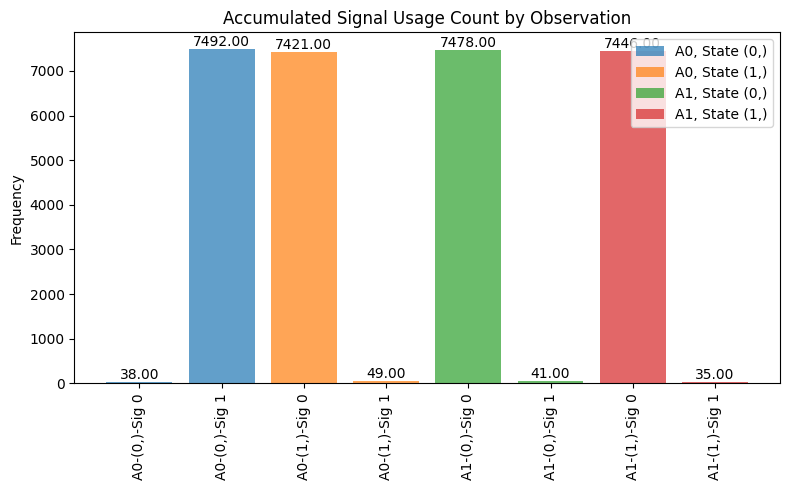

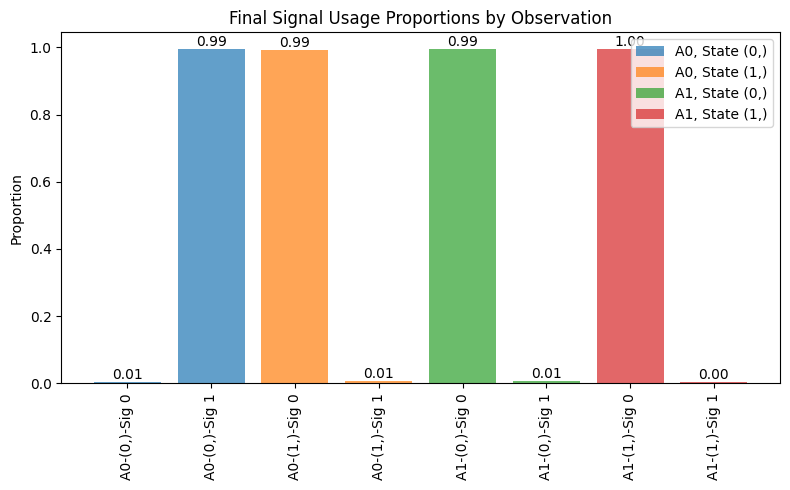

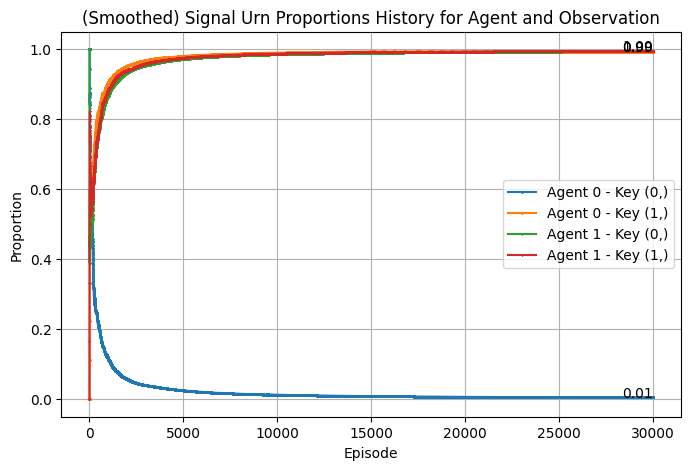

In [12]:
n_agents = 2
n_features = 2
agents_observed_variables = {0:[0],1:[1]}

G = nx.DiGraph()
G.add_nodes_from([0,1])  # Adds multiple nodes at once
G.add_edges_from([(0, 1), (1, 0)])  # Adds multiple edges

n_signaling_actions = 2
n_final_actions = 4

# n_agents = 2
# n_features = 3
# agents_observed_variables = {0:[0,1],1:[1,2]}
# n_signaling_actions = 4
# n_final_actions = 8

randomcannonical_game = {}
for i in range(n_agents):
  randomcannonical_game[i] = create_random_canonical_game(n_features,n_final_actions,n=1,m=0)

with_signals, full_information = True, False

env = TempNetMultiAgentEnv(
    n_agents=n_agents,
    n_features=n_features,
    n_signaling_actions=n_signaling_actions,
    n_final_actions=n_final_actions,
    # learning rate is not actually used here
    learning_rate=0.1, 
    exploration_rate=1.0,
    exploration_decay=0.995, min_exploration_rate=0.001,
    full_information=False,
    game_dicts=randomcannonical_game,
    observed_variables=agents_observed_variables,
    agent_type=TDLearningAgent,  # Your modified agent class
    graph=G)

signal_usage, rewards_history, signal_information_history, nature_history, histories = temp_simulation_function(n_agents=n_agents,
                      n_features=n_features, n_signaling_actions=n_signaling_actions, n_final_actions=n_final_actions,
                      n_episodes=15000, with_signals = with_signals,
                      plot=True,env=env, verbose=False)